<a href="https://colab.research.google.com/github/Asma-A23/Data-201/blob/main/Data_201_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Predicting Diabetes with a Logistic Regression Model**

Asma Abbas

Cody Paulay-Simmons

Ike Charistan Depenyou

Moutaz Mohamed

Professor Abdirisak Mohamed

Data 201

## Section 1: Introduction

For this project we used a dataset from Kaggle (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset), that was a composite of Electronic Health Records collected from multiple healthcare providers and aggregated into a singular data set. The dataset has 100000 rows and 9 columns representing gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes, represented by either a 0 (does not have diabetes) or 1 (has diabetes). This dataset provides information that can be used to predict and analyze the patterns in diabetes prevalence among those with certain health factors.

Some questions that we are interested in exploring are:

*   Are certain indicators (BMI (weight to height ratio), HbA1c (average blood glucose percentage), and age strongly associated with having diabetes?
*   Can logistic regression accurately predict whether someone has diabetes?
*   How well can our model identify individuals who actually have diabetes?

## Section 2: Data Wrangling


In [ ]:
## Prepare and Wrangle Data using Panda and Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MoutazMohamed0/Data201/refs/heads/main/diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# The size of the dataset
df.shape

(100000, 9)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# What are the variables measured in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Section 3 EDA & Data Visualization

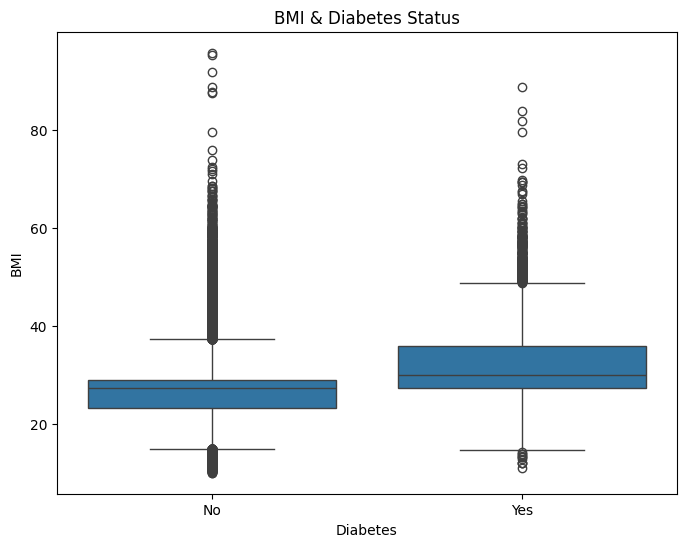

In [ ]:
# Boxplot of BMI & Diabetes Status
df['diabetes_label'] = df['diabetes'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.boxplot(x="diabetes_label", y="bmi", data=df)
plt.title("BMI & Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.show()

This boxplot compares the BMI values of individuals with and without diabetes. Overall, both groups show a wide range of BMI values with extreme outliers, but the median BMI is higher for individuals with diabetes, suggesting that people with diabetes tend to have higher body mass on average. The non-diabetic group shows a lower median, suggesting that a lower BMI is more common among those without diabetes. The outliers in both groups show that some individuals may have unusually high BMI regardless of whether or not they have diabetes, but overall there still seems to be a positive correlation between higher BMI and the likelihood of having diabetes.

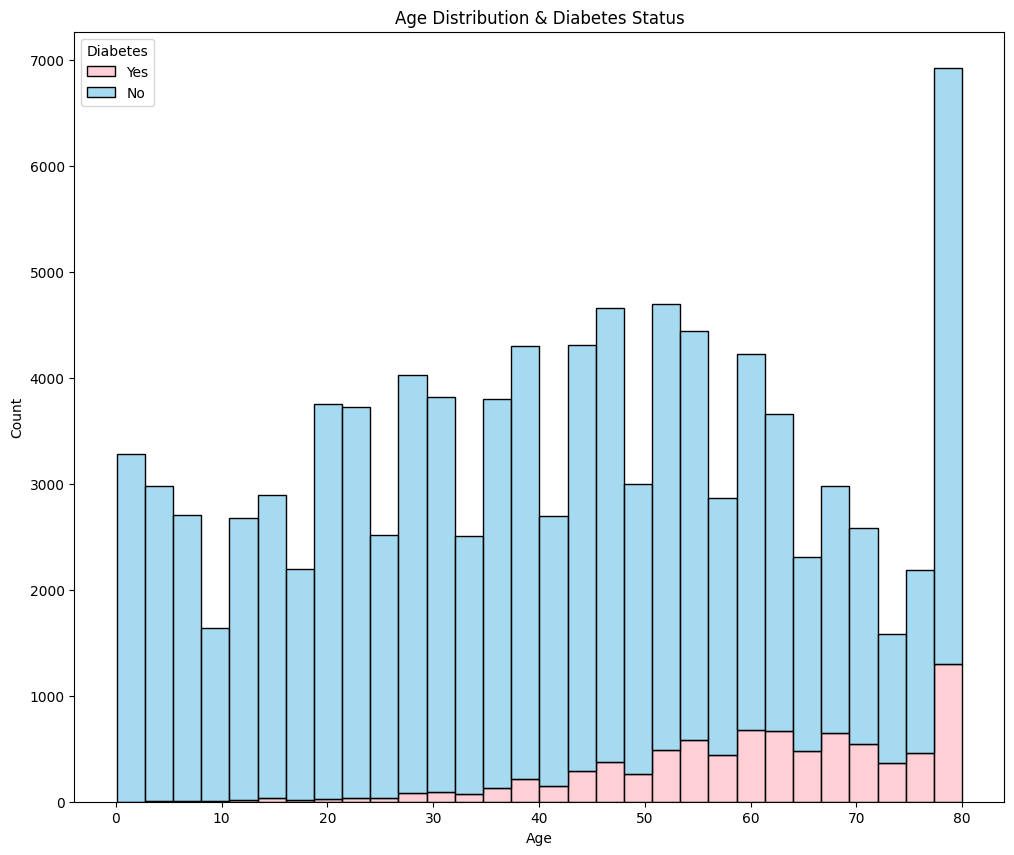

In [ ]:
# Histogram of Age and Diabetes Status
plt.figure(figsize=(12,10))
sns.histplot(data=df, x="age", bins=30, hue="diabetes", multiple="stack", palette={0: "skyblue", 1: "pink"})
plt.title("Age Distribution & Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["Yes", "No"])
plt.show()

This histogram shows the prevalence of diabetes across different age groups. The non-diabetic group is much more common amongst younger individuals. However starting at age 30 and onward until late adulthood
the number of diabetic individuals begins to rise while the non-diabetic population gradually decreases. This all suggests that there is a strong correlation between higher age and diabetes.

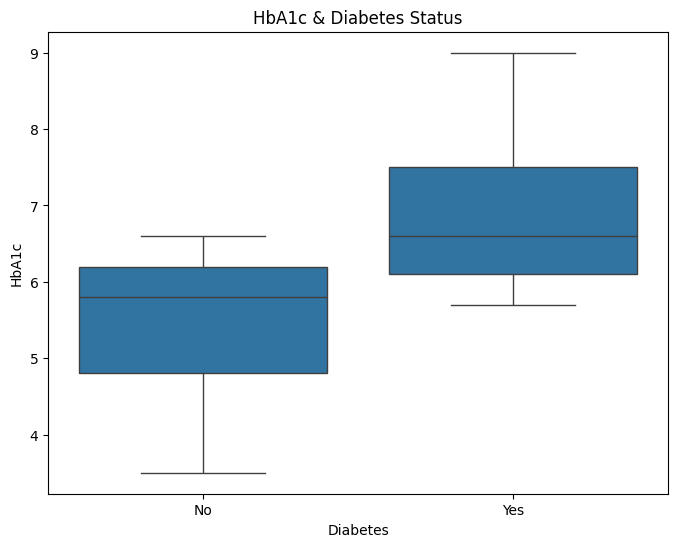

In [ ]:
# Boxplot of HbA1c and Diabetes Status
df['diabetes_label'] = df['diabetes'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.boxplot(x="diabetes_label", y="HbA1c_level", data=df)
plt.title("HbA1c & Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("HbA1c")
plt.show()

This boxplot shows the distribution of HbA1c levels for individuals with and without diabetes. Individuals without diabetes seem to have a much lower overall and median HbA1c levels overall. While individuals diabetes seem to have significantly higher overall and median HbA1c levels. This graph suggests that there is a strong correlation between higher HbA1c levels and diabetes.

## Section 4: Scikit-Learn, Training, Prediction, and Accuracy

In [ ]:
# Using scikit-learn linear regression to train, test and predict a target variable
# Pick desired x columns
xcols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
         'hypertension', 'heart_disease']
ycol = ['diabetes']

# Drop rows with missing values to clean model dataset
df_ml = df[xcols + ycol].dropna()

# Subset the response and predictor variables
X = df_ml[xcols]
y = df_ml[ycol]

# Split the model into training and testing data
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.30, random_state=10)

# Check split data size
print("Shape of training and testing data:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of training and testing data: (70000, 6) (30000, 6) (70000, 1) (30000, 1)


In [ ]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [ ]:
# Predict the classes of the test data
y_pred = LogReg.predict(X_test)
print(y_pred[:10])

[0 0 0 1 0 0 0 0 1 0]


In [ ]:
# Predict the class probability of the test data
y_proba = LogReg.predict_proba(X_test)
print(y_proba[:10])

[[9.99989152e-01 1.08480589e-05]
 [9.94803276e-01 5.19672351e-03]
 [8.97344633e-01 1.02655367e-01]
 [4.50067836e-01 5.49932164e-01]
 [9.98949708e-01 1.05029219e-03]
 [9.99485796e-01 5.14203760e-04]
 [9.89182965e-01 1.08170347e-02]
 [9.99242039e-01 7.57960503e-04]
 [1.82195078e-01 8.17804922e-01]
 [9.95259872e-01 4.74012830e-03]]


###Interpreting the predictions

Using the scaled test data, the logistic regression model generated both class predictions and class probability estimates for each individual. The first ten predictions were [0 0 0 1 0 0 0 0 1 0], where 0 indicates the model predicts no diabetes, and 1 indicates the model predicts diabetes, these predictions show that our model predicts that the 4th and 9th individuals will have diabetes. The probability outputs provide greater insight into how confident the model is in each prediction. The prediction [9.99989152e-01, 1.08480589e-05] for the first individual indicates that the model is 99.99% confident that this individual does not have diabetes. While a prediction of [4.50067836e-01, 5.49932164e-01] for the fourth individual indicates that the model is 54.9% confident that this individual does have diabetes. These probability estimates show that the model can both make predictions and asses the strength of its predictions.

In [ ]:
# Use an appropriate metric (Accuracy Score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9601666666666666


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27450
           1       0.87      0.63      0.73      2550

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[27208   242]
 [  953  1597]]


###Interpreting the meaning of the scores & evaluating the model

The model displays strong performance in predicting diabetes, with an accuracy score of 0.9601, meaning that it correctly modeled 96.01% of the 30000 individuals in the test dataset. The classification report shows how the model performs for each class, for non-diabetics (0), the model had an precision of 0.97 and a recall of 0.99, meaning that it was reliable at identifying healthy individuals. For diabetics (1), the model had a precision of  0.87 but a recall of only  0.63, meaning that the model failed to detect a significant portion of diabetes cases. The F1-scores are 0.98 for non-diabetics (0) and 0.73 for diabetics (1), showing that the model has a strong performance modeling the non-diabetic class and a relatively weaker performance modeling the diabetics. This is corroborated by the confusion matrix. Of the non-diabetic individuals in the test dataset, the model produced  27208 true negatives and 242 false positives (non-diabetics that were incorrectly classified as diabetic), of the diabetic individuals in the test dataset, the model only produced 1597 true positives and 953 false negatives (diabetics that were incorrectly classified as non-diabetic).

### Why One versus All and One versus One are not applicable here

One versus All and One versus One are not applicable in this project because, we dont have a multiclass we only have two groups (binomial), people with without diabetes (0) and with diabetes (1) meaning that the model should intuitively be able to distinguish and define the boundary that divides non-diabetics from diabetics.

##Section 5: Interpretation and Conclusion

In conclusion the logistic regression model performed well in predicting diabetes for this dataset. It had an accuracy score of 96.01% meaning that the model correctly classified the 30000 individuals that were part of our test set 96.01 percent of the time. The classification report provides further insight on the model’s utility. For non-diabetics (0), the model had a precision score of 0.97 and a recall of 0.99, meaning it was extremely reliable in identifying healthy individuals and rarely mislabeled them as diabetic (false positive). However, for diabetics (1), the precision is 0.87 and the recall is only 0.63. meaning that the model failed to detect diabetes (false negative) for a substantial portion of individuals with diabetes (the confusion matrix showed 1597 true positives but also 953 false negatives). These results suggest that while our model is generally effective in its accuracy it still struggles to catch all real diabetes cases.